In [226]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn   

# Страхование автомобилей
Допустим, автомобилист страхует своё транспортное средство в страховой компании. Рассматривается следующий вопрос: скорее всего, обратится клиент в страховую компанию за выплатой в течение страхового срока (год) или нет (т.е., грубо говоря, попадёт он в ДТП или нет). Данные взяты с сайта kaggle.com (датасет "Car Insurance Data" от 2021-го года).

## Чтение данных

In [227]:
ci = pd.read_csv('Car_Insurance_Claim.csv')
ci.shape

(10000, 19)

In [228]:
ci.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Таблица содержит данные о 10000 водителей, бывших клиентами одной из страховых компаний. Каждая строка соответствует одному водителю, а столбцы (их 19) - признака. Обратимся к ним и разберём значение каждого из них.

In [229]:
ci.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

### Названия признаков:
- ID                   - идентификатор водителя
- AGE                  - возраст водителя
- GENDER               - пол водителя
- RACE                 - "гоняет" ли водитель
- DRIVING_EXPERIENCE   - водительский стаж
- EDUCATION            - образование
- INCOME               - уровень дохода
- CREDIT_SCORE         - "кредитный рейтинг"
- VEHICLE_OWNERSHIP    - нахождение страхуемого автомобиля в собственности у данного водителя
- VEHICLE_YEAR         - год выпуска автомобиля
- MARRIED              - состоит ли водитель в браке
- CHILDREN             - наличие детей у водителя
- POSTAL_CODE          - почтовый индекс (район места жительства) водителя
- ANNUAL_MILEAGE       - годовой пробег автомобиля в милях
- VEHICLE_TYPE         - тип кузова автомобиля (класс)
- SPEEDING_VIOLATIONS  - количество нарушений водителем скоростного режима
- DUIS                 - зафиксированные случаи пьянства за рулём
- PAST_ACCIDENTS       - количество прошедших инцидентов с участием данного водителя
- OUTCOME              - результат (обратился водитель в страховую компанию за выплатой или нет) - признак, который нужно предсказать

Среди признаков фигурируют категориальные (например, AGE и INCOME), количественные (например, SPEEDING_VIOLATIONS) и бинарные (включая целевой OUTCOME).

Убедимся, что значения категориальных признаков в данный момент имеют тип "object", и заменим его на специальный, предназначенный для хранения категориальных значений:

In [230]:
print(ci['DRIVING_EXPERIENCE'].dtype,
ci['AGE'].dtype,
ci['GENDER'].dtype,
ci['RACE'].dtype,
ci['EDUCATION'].dtype,
ci['VEHICLE_TYPE'].dtype,
ci['VEHICLE_YEAR'].dtype,
ci['INCOME'].dtype)

object object object object object object object object


In [231]:
ci['DRIVING_EXPERIENCE'] = ci['DRIVING_EXPERIENCE'].astype('category')
ci['DRIVING_EXPERIENCE'].dtype

CategoricalDtype(categories=['0-9y', '10-19y', '20-29y', '30y+'], ordered=False)

In [232]:
ci['AGE'] = ci['AGE'].astype('category')
ci['GENDER'] = ci['GENDER'].astype('category')
ci['RACE'] = ci['RACE'].astype('category')
ci['EDUCATION'] = ci['EDUCATION'].astype('category')
ci['VEHICLE_TYPE'] = ci['VEHICLE_TYPE'].astype('category')
ci['VEHICLE_YEAR'] = ci['VEHICLE_YEAR'].astype('category')
ci['INCOME'] = ci['INCOME'].astype('category')

Заодно изменим тип данных тех признаков, которые мы считаем бинарными (в том числе целевой), на bool, чтобы при рассмотрении статистики и визуализации данных данные признаки не входили в обзор вместе с количественными. После этого соответствующие им столбцы будут иметь значения True или False.

In [233]:
ci['VEHICLE_OWNERSHIP'] = ci['VEHICLE_OWNERSHIP'].astype('bool')
ci['MARRIED'] = ci['MARRIED'].astype('bool')
ci['CHILDREN'] = ci['CHILDREN'].astype('bool')
ci['OUTCOME'] = ci['OUTCOME'].astype('bool')
ci.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


Обратим внимание, что в двух столбцах есть пропущенные значения:

In [234]:
ci.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Убедимся, что можем выводить не всю таблицу "целиком", но и, например, отдельные столбцы:

In [235]:
ci.loc[:, ['AGE', 'OUTCOME']]

,AGE,OUTCOME
0,65+,False
1,16-25,True
2,16-25,False
3,16-25,False
4,26-39,True
...,...,...
9995,26-39,False
9996,26-39,False
9997,26-39,False
9998,26-39,True


## Визуализация данных и вычисление основных характеристик
Для начала посмотрим на таблицу, содержащую сводную информацию о признаках:

In [236]:
ci.describe()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


Эта таблица содержит информацию о количественных признаках. Так, например, максимальный кредитный рейтинг среди всех водителей составляет 0.960819, а значение в 12000 миль делит все значения годовых пробегов на две половины: больших и меньших значений. Теперь получим информацию о категориальных:

In [237]:
ci.describe(include=['category'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Отсюда мы можем видеть, например, то, что среди категориальных признаков нет пропущенных значений, база данных резделяет 3 уровня образования, а большинство водителей в базе - женского пола, каковых насчитывается 5010 человек. Аналогичную таблицу выведем и для бинарных признаков:

In [238]:
ci.describe(include=['bool'])

,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,OUTCOME
count,10000,10000,10000,10000
unique,2,2,2,2
top,True,False,True,False
freq,6970,5018,6888,6867


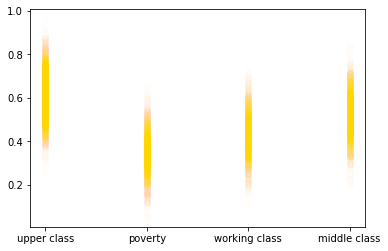

In [239]:
plt.scatter(ci['INCOME'], ci['CREDIT_SCORE'], alpha=0.01, color = 'gold')
pass

Данная диаграмма рассеивания показывает, что на кредитный рейтинг клиента страховой компании напрямую влияет его доход: если у небогатого населения большинство значений колеблются примерно от 0,2 до 0,5, то у богатых людей - от 0,4 до 0,8. Мы имеем не так много признаков, которые имеют большой набор различных значений, поэтому в нашем случае диаграмма рассеивания не лучший вариант визуализации данных.

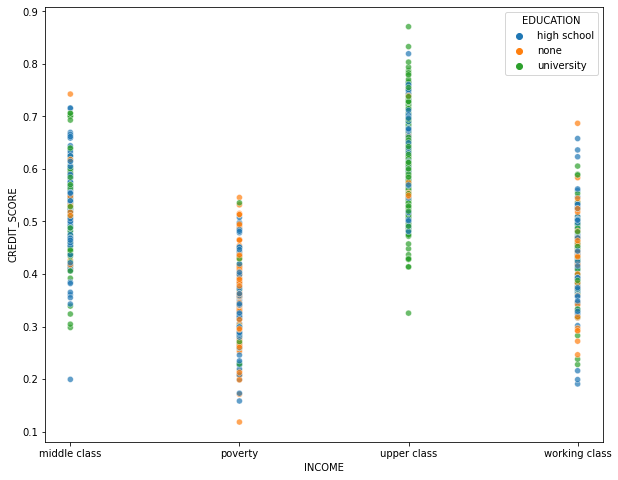

In [240]:
random_subset = np.random.choice(np.arange(ci.shape[0]), size=1000, replace=False)
plt.figure(figsize = (10, 8))
sns.scatterplot(x='INCOME', y='CREDIT_SCORE', hue='EDUCATION', data=ci.iloc[random_subset], alpha=0.7)
pass

Это аналогичная диаграмма рассеивания, только имеющая дополнительную информацию о том, что те, кто хорошо зарабатывает, имеют в среднем не только высокий кредитный рейтинг, но и в своём большинстве университетское образование, что нельзя сказать о небогатых людях, многие из которых не имеют никакого образования.

c:\users\zayat\pycharmprojects\pythonproject1\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


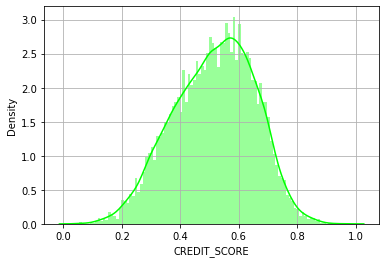

In [241]:
sns.distplot(ci['CREDIT_SCORE'], bins=100, color = 'lime')
plt.grid()
pass

Данная гистограмма с графиком показывает распределений значений кредитного рейтинга водителей.

c:\users\zayat\pycharmprojects\pythonproject1\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


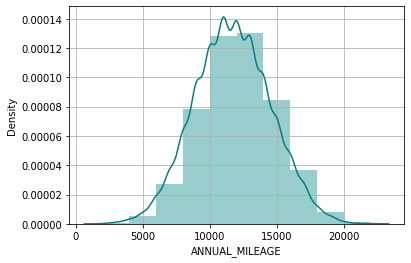

In [242]:
sns.distplot(ci['ANNUAL_MILEAGE'], bins=10, color = 'teal')
plt.grid()
pass

А эта - распределение годовых пробегов автомобилей.

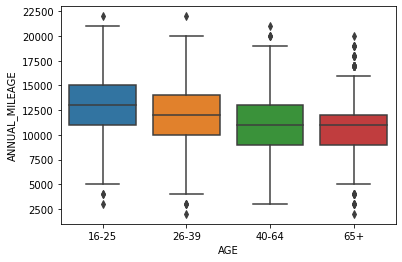

In [243]:
sns.boxplot(x='AGE', y='ANNUAL_MILEAGE', data=ci)
pass

Это "ящик с усами", который помогает проанализировать значения годового пробега автомобилей водителей различных возрастных категорий. Он отображает значения квартильные значения признака ANNUAL_MILEAGE, медианные значения, а также диапазоны значений для разных категорий.

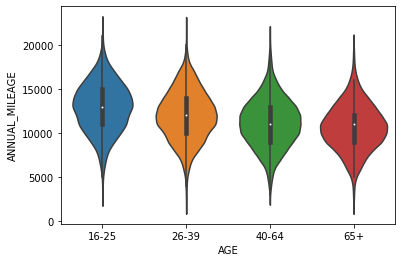

In [244]:
sns.violinplot(x='AGE', y='ANNUAL_MILEAGE', data=ci)
pass

Скрипичные графики отображают графики аппроксимации плотности вероятности для тех же величин. Данные методы отображения зависимостей не подходят для отображения зависимости целевой функции нашей задачи от других признаков, т.к. она может принимать лишь два значения: True и False.

In [245]:
corr_mat = ci.corr()
corr_mat

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


Выше выведена матрица корреляции, показывающая зависимость количественных и бинарных признаков друг от друга. Также можно визуализировать эту таблицу: чем светлее ячейка, тем меньше по абсолютной величине коэффициент корреляции:

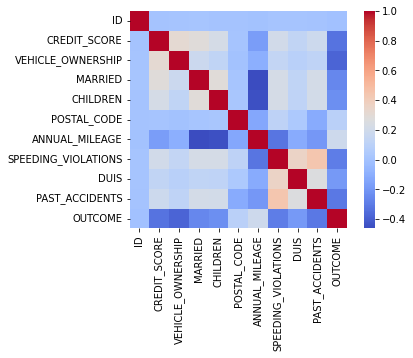

In [246]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Можно отследить, насколько сильно одна величина зависит от другой. Например, строка ID - полностью светлая, т.к. это просто идентификатор пользователя, который никак не влияет на остальные признаки.

Гистограммы также позволяют наглядно представить те или иные соотношения. Например, соотношение количества людей, состоящих в базе, с разными уровнями дохода:

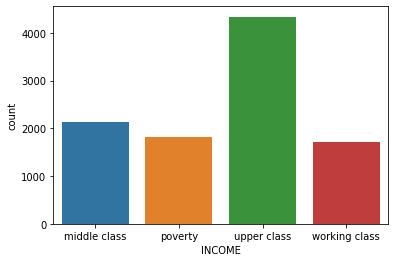

In [247]:
sns.countplot(x='INCOME', data=ci)
pass

Теперь более подробно рассмотрим гистограммы, отображающие средние значения целевого признака при различных значениях других признаков:

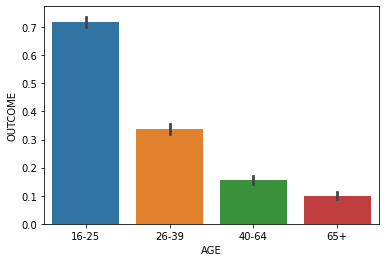

In [248]:
sns.barplot(x='AGE', y='OUTCOME', data=ci)
pass

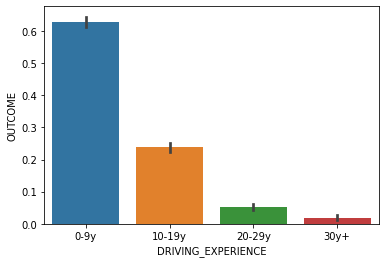

In [249]:
sns.barplot(x='DRIVING_EXPERIENCE', y='OUTCOME', data=ci)
pass

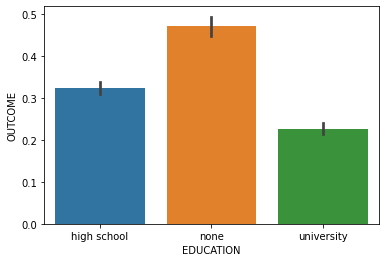

In [250]:
sns.barplot(x='EDUCATION', y='OUTCOME', data=ci)
pass

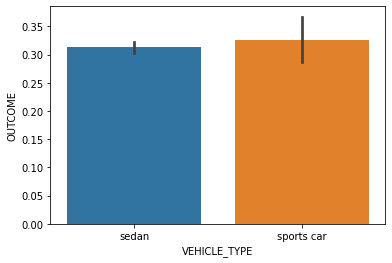

In [251]:
sns.barplot(x='VEHICLE_TYPE', y='OUTCOME', data=ci)
pass

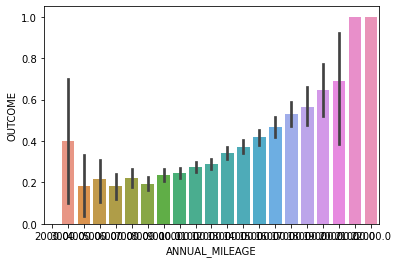

In [252]:
sns.barplot(x='ANNUAL_MILEAGE', y='OUTCOME', data=ci)
pass

Из этих гистограмм видно, что, например, возраст и образования водителя, его стаж вождения вполне логично влияют на значение целевой функции: чем моложе водители и меньше их стаж, тем чаще они запрашивают страховые выплаты. А вот тип кузова ТС на значение целевой функции практически не влияет: столбики примерно одинаковой высоты.

## Обработка пропущенных значений
Как мы уже видели, два признака имеют пропущенные значения: CREDIT_SCORE и ANUAL_MILEAGE. Заменим их средними значениями, т.к. это количественные признаки, а также из-за того, что опытным путём в ходе дальнейшего решения задачи было определено, что именно такое заполнение пропущенных значений позволяет решить задачу с большей точностью.

In [253]:
ci['CREDIT_SCORE'].fillna(ci['CREDIT_SCORE'].mean(axis = 0), axis=0 , inplace=True)
ci['ANNUAL_MILEAGE'].fillna(ci['ANNUAL_MILEAGE'].mean(axis = 0), axis=0, inplace=True)
ci.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Теперь пропущенных значений нет. Выведем обновлённую сводную таблицу для количественных признаков:

In [254]:
ci.describe()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.130752,18915.613855,2680.167384,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.431509,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.515813,10238.000000,11697.003207,0.000000,0.00000,0.000000
75%,753974.500000,0.607607,32765.000000,13000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


## Обработка и категориальных признаков
Категориальные признаки, которые могут принимать только два значения, преобразуем в числовые. Тогда одному возможному значению каждого из этих признаков будет соответствовать 0, а другому - 1.

In [255]:
ci['GENDER'] = pd.factorize(ci['GENDER'])[0]
ci['RACE'] = pd.factorize(ci['RACE'])[0]
ci['VEHICLE_TYPE'] = pd.factorize(ci['VEHICLE_TYPE'])[0]
ci['VEHICLE_YEAR'] = pd.factorize(ci['VEHICLE_YEAR'])[0]
ci.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,0,0,0-9y,high school,upper class,0.629027,True,0,False,True,10238,12000.0,0,0,0,0,False
1,750365,16-25,1,0,0-9y,none,poverty,0.357757,False,1,False,False,10238,16000.0,0,0,0,0,True
2,199901,16-25,0,0,0-9y,high school,working class,0.493146,True,1,False,False,10238,11000.0,0,0,0,0,False
3,478866,16-25,1,0,0-9y,university,working class,0.206013,True,1,False,True,32765,11000.0,0,0,0,0,False
4,731664,26-39,1,0,10-19y,none,working class,0.388366,True,1,False,False,32765,12000.0,0,2,0,1,True


К оставшимся четырём категориальным признакам применим метод бинаризации, а получившиеся столбцы добавим в исходную таблицу:

In [256]:
DE_dummies = pd.get_dummies(ci['DRIVING_EXPERIENCE'])
DE_dummies.head()

,0-9y,10-19y,20-29y,30y+
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [257]:
ci = ci.drop(['DRIVING_EXPERIENCE'], axis=1)

In [258]:
ci = pd.concat((ci, DE_dummies), axis=1)
AGE_dummies = pd.get_dummies(ci['AGE'])
AGE_dummies.head()
ci = pd.concat((ci, AGE_dummies), axis=1)
ci = ci.drop(['AGE'], axis=1)
EDUCATION_dummies = pd.get_dummies(ci['EDUCATION'])
EDUCATION_dummies.head()
ci = pd.concat((ci, EDUCATION_dummies), axis=1)
ci = ci.drop(['EDUCATION'], axis=1)
INCOME_dummies = pd.get_dummies(ci['INCOME'])
INCOME_dummies.head()
ci = pd.concat((ci, INCOME_dummies), axis=1)
ci = ci.drop(['INCOME'], axis=1)
ci.head()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,26-39,40-64,65+,high school,none,university,middle class,poverty,upper class,working class
0,569520,0,0,0.629027,True,0,False,True,10238,12000.0,...,0,0,1,1,0,0,0,0,1,0
1,750365,1,0,0.357757,False,1,False,False,10238,16000.0,...,0,0,0,0,1,0,0,1,0,0
2,199901,0,0,0.493146,True,1,False,False,10238,11000.0,...,0,0,0,1,0,0,0,0,0,1
3,478866,1,0,0.206013,True,1,False,True,32765,11000.0,...,0,0,0,0,0,1,0,0,0,1
4,731664,1,0,0.388366,True,1,False,False,32765,12000.0,...,1,0,0,0,1,0,0,0,0,1


Мы видим новую таблицу, которая по сути не имеет категориальных признаков и состоит из 30 столбцов.

## Нормализация признаков

Перед тем, как нормализовать признаки, подумаем, некоторые значение каких признаков могут сбить нашу программу с правильного пути, "неправильно" её обучив. Обратим внимание на признаки 'DUIS' и 'POSTAL_CODE':

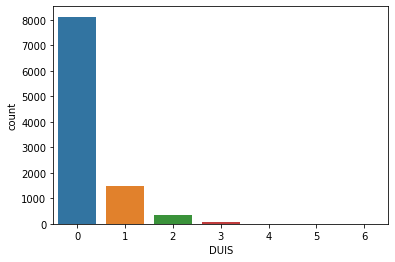

In [259]:
sns.countplot(x='DUIS', data=ci)
pass

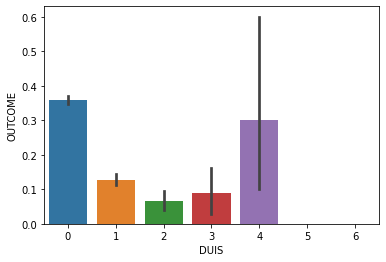

In [260]:
sns.barplot(x='DUIS', y='OUTCOME', data=ci)
pass

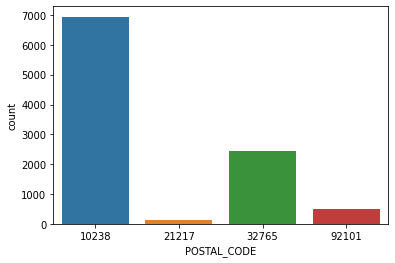

In [261]:
sns.countplot(x='POSTAL_CODE', data=ci)
pass

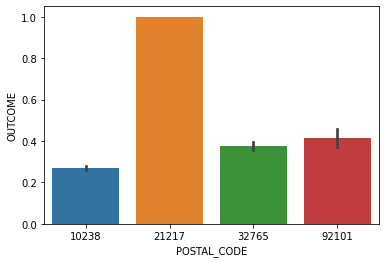

In [262]:
sns.barplot(x='POSTAL_CODE', y='OUTCOME', data=ci)
pass

По этим гистограммам можно заметить, что значения признака DUIS больше 2 встречаются на порядок реже, чем остальные, при этом среднее значение целевого признака по ним "выбиваются" из статистики, которую составляют популярные значения данного признака. А водители, значение признака POSTAL_CODE которых составляет 21217, вообще запрашивали страховые выплаты в полном своём составе. Понимая, что это просто люди, живущие на каком-то одном районе с данным значением почтового кода, можно сделать вывод, что реальная статистика не может быть стопроцентной. Исходя из этих суждений, примем решение о том, что лучше удалить из таблицы объекты (водителей), значение признака POSTAL_CODE которых составляет 21217, а DUIS - больше 2. (Данные и похожие решения принимаем исходя не только из рассуждений, но и эмпирическим путём, перебирая различные комбинации и изучая, как меняется точность решения задачи при удалении тех или иных признаков и объектов).

In [263]:
ci = ci.loc[ci['POSTAL_CODE'] != 21217]
ci = ci.loc[ci['DUIS'] <= 2]
ci = ci.reset_index(drop=True)
ci.shape

(9799, 30)

Теперь осталось не 10000, а 9799 объектов.

Проведём стандартизацию количественных (в том числе бинарных) признаков:

In [264]:
ci_stand = (ci - ci.mean(axis = 0))/ci.std(axis = 0)
ci_stand

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,26-39,40-64,65+,high school,none,university,middle class,poverty,upper class,working class
0,0.235258,-0.995367,-0.332768,0.869279,0.661515,-1.519579,-0.992932,0.674776,-0.501443,0.110720,...,-0.668697,-0.640699,2.019105,1.182887,-0.487857,-0.801160,-0.520816,-0.474508,1.147590,-0.454537
1,0.860055,1.004552,-0.332768,-1.202521,-1.511527,0.658010,-0.992932,-1.481822,-0.501443,1.602352,...,-0.668697,-0.640699,-0.495218,-0.845303,2.049570,-0.801160,-0.520816,2.107229,-0.871303,-0.454537
2,-1.041729,-0.995367,-0.332768,-0.168503,0.661515,0.658010,-0.992932,-1.481822,-0.501443,-0.262188,...,-0.668697,-0.640699,-0.495218,1.182887,-0.487857,-0.801160,-0.520816,-0.474508,-0.871303,2.199817
3,-0.077940,1.004552,-0.332768,-2.361453,0.661515,0.658010,-0.992932,0.674776,0.680226,-0.262188,...,-0.668697,-0.640699,-0.495218,-0.845303,-0.487857,1.248062,-0.520816,-0.474508,-0.871303,2.199817
4,0.795446,1.004552,-0.332768,-0.968749,0.661515,0.658010,-0.992932,-1.481822,0.680226,0.110720,...,1.495293,-0.640699,-0.495218,-0.845303,2.049570,-0.801160,-0.520816,-0.474508,-0.871303,2.199817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,-0.615871,-0.995367,-0.332768,0.516124,0.661515,0.658010,-0.992932,-1.481822,-0.501443,1.602352,...,1.495293,-0.640699,-0.495218,-0.845303,-0.487857,1.248062,-0.520816,-0.474508,1.147590,-0.454537
9795,1.412769,-0.995367,-0.332768,0.053636,0.661515,-1.519579,-0.992932,0.674776,0.680226,-0.002270,...,1.495293,-0.640699,-0.495218,-0.845303,2.049570,-0.801160,1.919869,-0.474508,-0.871303,-0.454537
9796,-0.114067,1.004552,-0.332768,-0.338095,0.661515,0.658010,-0.992932,0.674776,-0.501443,0.856536,...,1.495293,-0.640699,-0.495218,1.182887,-0.487857,-0.801160,1.919869,-0.474508,-0.871303,-0.454537
9797,1.388976,-0.995367,-0.332768,-1.153430,-1.511527,0.658010,-0.992932,0.674776,-0.501443,0.483628,...,1.495293,-0.640699,-0.495218,1.182887,-0.487857,-0.801160,-0.520816,2.107229,-0.871303,-0.454537


## Разбиение данных на обучающую и тестовую выборки
Разобьём данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая). Обратим внимание, что признаки 'ID' и 'RACE' не влияют на значение целевого признака, поэтому их для предсказания признака OUTCOME мы использовать не будем.

In [265]:
X = ci_stand.drop(['ID','OUTCOME', 'RACE'], axis=1)
y = ci['OUTCOME']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(7349, 2450)

## Запуск классификатора ближайших соседей

Попробовав различные параметры для классификатора, обратим внимание, с какими из них задача решается с большей точностью, и остановимся на n_neighbors=5 и p=1:

In [266]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(p=1)

## Вычисление ошибок на обучающей и тестовой выборках

In [267]:
1 - model.score(X_train, y_train), 1 - model.score(X_test, y_test)

c:\users\zayat\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\zayat\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(0.1285889236630834, 0.16979591836734698)

Ошибка на обучающей выборке составила 13%, на тестовой - 17%. Изменяя параметры, мы можем улучшить лишь один из показателей, но в целом для данной задачи данные значения параметров окзались оптимальными. Оценим результаты решения задачи в общих выводах.

## Общие выводы

Итак, путём анализа данных и эмпирическим путём мы постарались решить данную задачу с минимальными процентами ошибок. Мы пробовали отбрасывать небольшую часть объектов по тем или иным значениям некоторых из признаков, по-разному изменять пропущенные значения, отбрасывать различные признаки при обучении программы, подбирать различные параметры классификатора и т.д. При рассмотрении каждого из этих вопросов мы шли тем путём, который позволял сделать процент ошибок наименьшим (в первую очередь - на тестовой выборке). Получились довольно высокие проценты ошибок - попробуем объяснить такой результат. Данная задача состоит в том, чтобы классифицировать объект (водителя) к одному из двух классов. Если сравнить, например, с задачей идентификации рукописной цифры, где человек почти всегда может правильно это сделать, здесь всё не так просто. Даже опытный работник сферы страхования не в силах предсказать наверняка, попадёт данный водитель в ДТП или нет. Тем более, что в данном происшествии может быть виноват не только он, но и другие участники ПДД, а ведь это также страховой случай, который приводит значение целевой функции в 1. Не всё всегда зависит от самого водителя. То есть можно сказать, что доля случайности достаточно велика в вероятности данного события. Именно этим обосновываются такие высокие проценты ошибок, которые, на мой взгляд, для данной задачи не такие и высокие, а вполне приемлемые.

Работу выполнил студент гр. 381803-2 Заятников А.А.